In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [18]:
imm = pd.read_csv('./immigration_raw.csv')
imm.head()

,Year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Belgium,135281.0,147377.0,129477,120078,123158,146626,123702,126703,137860,150006
1,Bulgaria,NaN,NaN,14103,18570,26615,25223,21241,25597,29559,37929
2,Czechia,48317.0,27114.0,34337,30124,29897,29602,64083,51847,65910,105888
3,Denmark,52236.0,52833.0,54409,60312,68388,78492,74383,68579,64669,61384
4,Germany,404055.0,489422.0,592175,692713,884893,1571047,1029852,917109,893886,886341


In [19]:
imm = pd.melt(imm, id_vars='Year', value_vars=["20" + str(x) for x in range(10, 20)])
imm = imm.rename(columns={"Year": "country", "variable":"year", "value":"immigration"})
imm.head()

,country,year,immigration
0,Belgium,2010,135281.0
1,Bulgaria,2010,NaN
2,Czechia,2010,48317.0
3,Denmark,2010,52236.0
4,Germany,2010,404055.0


In [20]:
imm.to_csv("./immigration.csv")

,country,year,immigration,neutral,home_win,away_win,games_played,goal_diff,win_rate,log_immigration
0,Belgium,2010,135281.0,0,1,0,5,-2,0.200000,11.815109
2,Denmark,2010,52236.0,1,1,0,5,-3,0.200000,10.863527
3,Germany,2010,404055.0,1,1,2,6,6,0.500000,12.909306
4,Estonia,2010,2810.0,1,1,0,6,-2,0.166667,7.940940
5,Greece,2010,60462.0,0,1,1,3,2,0.666667,11.009770


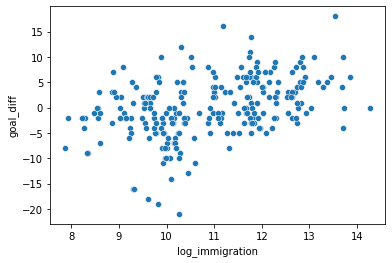

In [26]:
fb = pd.read_csv('../results_year.csv')
imm["year"] = pd.to_numeric(imm["year"])
imm_fb = pd.merge(imm, fb, on=["country", "year"])
imm_fb["log_immigration"] = np.log(imm_fb["immigration"])
imm_fb = imm_fb.dropna()
sns.scatterplot(data=imm_fb, x="log_immigration", y="goal_diff")
imm_fb.head()

<AxesSubplot:xlabel='log_immigration', ylabel='goal_diff'>

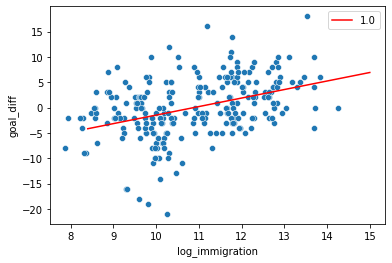

In [27]:
x = imm_fb["log_immigration"].to_numpy().reshape((-1, 1))
y = imm_fb["goal_diff"]
l_reg = LinearRegression().fit(x, y)
sns.scatterplot(data=imm_fb, x="log_immigration", y="goal_diff")

a,b = l_reg.coef_,l_reg.intercept_
x_line = np.linspace(8.4, 15, 100)
y_line = x_line * a + b
sns.lineplot(x=x_line, y=y_line, palette=['r'], hue=np.ones(100))

In [28]:
X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              goal_diff   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     46.29
Date:                Fri, 26 Nov 2021   Prob (F-statistic):           7.82e-11
Time:                        22:02:25   Log-Likelihood:                -763.24
No. Observations:                 246   AIC:                             1530.
Df Residuals:                     244   BIC:                             1537.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -18.2977      2.712     -6.746      0.0